In [1]:
import pandas as pd
import os
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, load_model, load_model
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split

In [2]:
os.listdir()

# Triedy obrázkov (zložky s obrázkami)
classes = {"1": "meningioma", "2": "glioma", "3": "pituitary tumor"}

# Základná cesta, kde sa nachádzajú zložky 1, 2, 3
base_path = "."  # alebo absolútna cesta napr. "/path/to/project"

# Zoznamy na uloženie spracovaných dát a labelov
data = []
labels = []

# Pre každú zložku
for zlozka in classes.keys():
    # Cesta k aktuálnej zložke
    cesta_zlozka = os.path.join(base_path, zlozka)

    # Skontroluj, či priečinok existuje
    if not os.path.exists(cesta_zlozka):
        print(f"Priečinok {cesta_zlozka} neexistuje. Skontroluj cestu.")
        continue

    # Pre každý obrázok v zložke
    for obrazok in os.listdir(cesta_zlozka):
        if obrazok.endswith(".png"):
            print(f"Načítavam: {obrazok} z triedy {classes[zlozka]}")
            cesta_aktualny_obrazok = os.path.join(cesta_zlozka, obrazok)
            
            try:
                image = Image.open(cesta_aktualny_obrazok).convert("RGB")
                image = image.resize((128, 128))  # Nová veľkosť 128x128
                image_array = np.array(image) / 255.0  # Normalizácia
                data.append(image_array)
                labels.append(int(zlozka))
            
            except Exception as e:
                print(f"Chyba pri spracovaní obrázku {cesta_aktualny_obrazok}: {e}")

# Prevod na numpy arrays
train_data = np.array(data)
labels = [int(zlozka) - 1 for zlozka in labels]  # Posun na 0, 1, 2
train_labels = to_categorical(np.array(labels), num_classes=3)

# Rozdelenie dát na tréningové a testovacie množiny
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

print("Tvar tréningových obrázkov:", X_train.shape)
print("Tvar testovacích obrázkov:", X_test.shape)
print("Tvar tréningových labelov:", y_train.shape)
print("Tvar testovacích labelov:", y_test.shape)

# **Vytvorenie modelu pomocou transfer learning (VGG16)**
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Zamrznutie pôvodných vrstiev (nechceme ich trénovať)
for layer in vgg16.layers:
    layer.trainable = False

# Pridanie vlastnej klasifikačnej hlavy
x = Flatten()(vgg16.output)
x = Dense(256, activation='relu')(x)
x = Dense(3, activation='softmax')(x)

# Finalizácia modelu
model = Model(inputs=vgg16.input, outputs=x)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Výpis štruktúry modelu
model.summary()

# **Tréning modelu**
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=50
)

# **Uloženie modelu**
model.save("brain_tumor_classifier.keras")

print("Model bol úspešne natrénovaný a uložený.")






Načítavam: 2300.png z triedy meningioma
Načítavam: 2301.png z triedy meningioma
Načítavam: 2302.png z triedy meningioma
Načítavam: 2303.png z triedy meningioma
Načítavam: 2304.png z triedy meningioma
Načítavam: 2305.png z triedy meningioma
Načítavam: 2306.png z triedy meningioma
Načítavam: 2307.png z triedy meningioma
Načítavam: 2308.png z triedy meningioma
Načítavam: 2309.png z triedy meningioma
Načítavam: 2310.png z triedy meningioma
Načítavam: 2311.png z triedy meningioma
Načítavam: 2312.png z triedy meningioma
Načítavam: 2313.png z triedy meningioma
Načítavam: 2314.png z triedy meningioma
Načítavam: 2315.png z triedy meningioma
Načítavam: 2316.png z triedy meningioma
Načítavam: 2317.png z triedy meningioma
Načítavam: 2318.png z triedy meningioma
Načítavam: 2319.png z triedy meningioma
Načítavam: 2320.png z triedy meningioma
Načítavam: 2321.png z triedy meningioma
Načítavam: 2322.png z triedy meningioma
Načítavam: 2323.png z triedy meningioma
Načítavam: 2324.png z triedy meningioma


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,867 (64.14 MB)

 Trainable params: 2,098,179 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 37s 7s/step - accuracy: 0.4442 - loss: 2.1163 - val_accuracy: 0.6833 - val_loss: 1.2111
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 33s 7s/step - accuracy: 0.6761 - loss: 0.9854 - val_accuracy: 0.7500 - val_loss: 0.3869
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 33s 7s/step - accuracy: 0.8467 - loss: 0.3471 - val_accuracy: 0.9000 - val_loss: 0.3045
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 33s 7s/step - accuracy: 0.9192 - loss: 0.1909 - val_accuracy: 0.9333 - val_loss: 0.2253
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 33s 7s/step - accuracy: 0.9450 - loss: 0.1612 - val_accuracy: 0.9333 - val_loss: 0.1996
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 39s 7s/step - accuracy: 0.9583 - loss: 0.1457 - val_accuracy: 0.9333 - val_loss: 0.1804
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 46s 8s/step - accuracy: 0.9597 - loss: 0.1198 - val_accuracy: 0.9500 - val_loss: 0.1650
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 35s 7s/step - accuracy: 0.9769 - loss: 0.0876 - val_accuracy: 0.9333 - val_loss: 0.1526
Epoch 9/

In [3]:
# Vyhodnotenie modelu na testovacích dátach
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Presnosť modelu na testovacích dátach: {test_accuracy * 100:.2f}%")
print(f"Testovacia strata: {test_loss:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.9451 - loss: 0.1206
Presnosť modelu na testovacích dátach: 93.33%
Testovacia strata: 0.1359


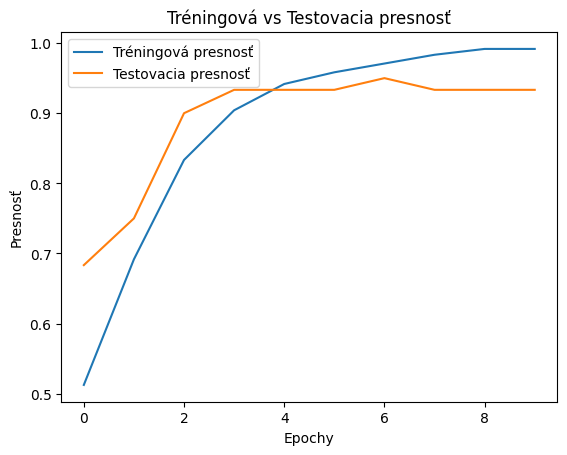

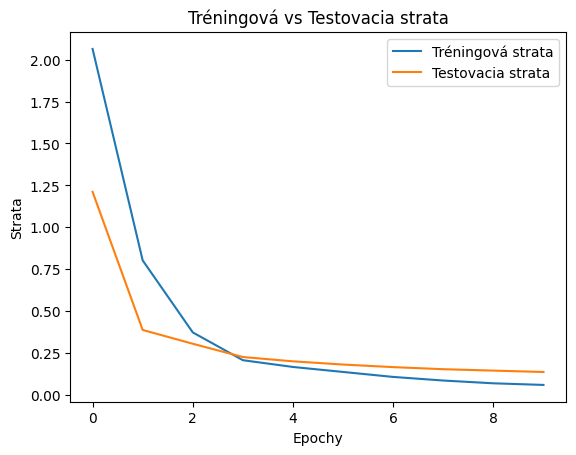

In [4]:
import matplotlib.pyplot as plt

# Graf presnosti
plt.plot(history.history['accuracy'], label='Tréningová presnosť')
plt.plot(history.history['val_accuracy'], label='Testovacia presnosť')
plt.xlabel('Epochy')
plt.ylabel('Presnosť')
plt.legend()
plt.title('Tréningová vs Testovacia presnosť')
plt.show()

# Graf straty
plt.plot(history.history['loss'], label='Tréningová strata')
plt.plot(history.history['val_loss'], label='Testovacia strata')
plt.xlabel('Epochy')
plt.ylabel('Strata')
plt.legend()
plt.title('Tréningová vs Testovacia strata')
plt.show()



In [5]:
# **Načítanie natrénovaného modelu**
model = load_model("brain_tumor_classifier.keras")

# **Funkcia na predikciu nového obrázka**
def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = image.resize((128, 128))
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)  # Pridanie dimenzie pre batch

    prediction = model.predict(image_array)
    predicted_class = np.argmax(prediction)

    class_names = ["meningioma", "glioma", "pituitary tumor"]
    print(f"Predikcia: {class_names[predicted_class]}")

# **Predikcia nového obrázka zo zložky 'Nahoda'**
predict_image("Nahoda/82.png")  # Nahraď názvom skutočného súboru


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step
Predikcia: glioma


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step


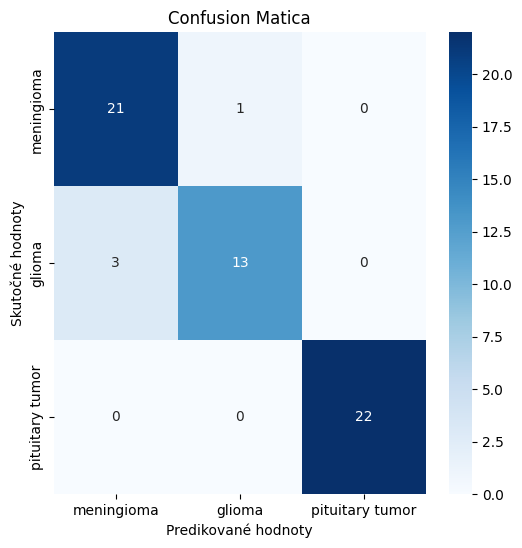

Klasifikačná správa:
                 precision    recall  f1-score   support

     meningioma       0.88      0.95      0.91        22
         glioma       0.93      0.81      0.87        16
pituitary tumor       1.00      1.00      1.00        22

       accuracy                           0.93        60
      macro avg       0.93      0.92      0.93        60
   weighted avg       0.94      0.93      0.93        60



In [7]:
# **Načítanie natrénovaného modelu**
model = load_model("brain_tumor_classifier.keras")

# **Confusion Matica**
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Konvertujeme one-hot encoding na triedy
y_true = np.argmax(y_test, axis=1)  # Skutočné triedy

# Vytvorenie confusion matice
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Vizualizácia confusion matice
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["meningioma", "glioma", "pituitary tumor"],
            yticklabels=["meningioma", "glioma", "pituitary tumor"])
plt.xlabel('Predikované hodnoty')
plt.ylabel('Skutočné hodnoty')
plt.title('Confusion Matica')
plt.show()

# Výpis podrobnej štatistiky klasifikácie
print("Klasifikačná správa:")
print(classification_report(y_true, y_pred_classes, target_names=["meningioma", "glioma", "pituitary tumor"]))
